# Explore here

In [64]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [65]:
# Leer csv
df = pd.read_csv('/workspaces/pille9-regularized-linear-regression/data/raw/demographic_health_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

VARIABLE OBJETIVO: OBESITY_PREVALENCE


In [66]:
df.shape

(3140, 108)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [68]:
# Analizar constantes
n_unicos = df.nunique()
n_unicos

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [69]:
# Revisar duplicados
df.duplicated().sum()

np.int64(0)

In [70]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fips,3140.0,NaN,NaN,NaN,30401.640764,15150.559265,1001.0,18180.5,29178.0,45081.5,56045.0
TOT_POP,3140.0,NaN,NaN,NaN,104189.41242,333583.395432,88.0,10963.25,25800.5,67913.0,10105518.0
0-9,3140.0,NaN,NaN,NaN,12740.302866,41807.301846,0.0,1280.5,3057.0,8097.0,1208253.0
0-9 y/o % of total pop,3140.0,NaN,NaN,NaN,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,25.460677
19-Oct,3140.0,NaN,NaN,NaN,13367.976752,42284.392134,0.0,1374.5,3274.0,8822.25,1239139.0
...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,NaN,NaN,NaN,3.446242,0.568059,1.8,3.1,3.4,3.8,6.2
CKD_Lower 95% CI,3140.0,NaN,NaN,NaN,3.207516,0.52774,1.7,2.9,3.2,3.5,5.8
CKD_Upper 95% CI,3140.0,NaN,NaN,NaN,3.710478,0.613069,1.9,3.3,3.7,4.1,6.6
CKD_number,3140.0,NaN,NaN,NaN,2466.234076,7730.422067,3.0,314.75,718.0,1776.25,237766.0


In [71]:
# Comprobar valores faltantes
df.isnull().mean()*100

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

In [72]:
df.isnull().any(axis=1).mean()*100

np.float64(0.0)

In [73]:
# Revisar columnas con valores idénticos
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].equals(df[col2]):
            print(f"Las columnas '{col1}' y '{col2}' son idénticas.")

Las columnas 'TOT_POP' y 'POP_ESTIMATE_2018' son idénticas.
Las columnas 'POP_ESTIMATE_2018' y 'TOT_POP' son idénticas.
Las columnas 'MEDHHINC_2018' y 'Median_Household_Income_2018' son idénticas.
Las columnas 'Median_Household_Income_2018' y 'MEDHHINC_2018' son idénticas.


In [74]:
# Elimino una de cada par de columnas
df.drop(columns=["POP_ESTIMATE_2018", "Median_Household_Income_2018"], inplace=True)

In [75]:
df['fips']

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3135    56037
3136    56039
3137    56041
3138    56043
3139    56045
Name: fips, Length: 3140, dtype: int64

In [76]:
df['CNTY_FIPS']


0        1
1        3
2        5
3        7
4        9
        ..
3135    37
3136    39
3137    41
3138    43
3139    45
Name: CNTY_FIPS, Length: 3140, dtype: int64

In [77]:
# Elimino CNTY_FIPS
df.drop(columns=["CNTY_FIPS"])

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,12209,49.069571,12042,48.398376,164,0.659137,113,0.4

In [78]:
# Elimino COUNTY_NAME y STATE_NAME
df.drop(columns=["COUNTY_NAME", "STATE_NAME"], inplace=True)

In [79]:
# Elimino columnas con el símbolo % en el nombre
df = df[[col for col in df.columns if "%" not in col]]

In [80]:
# Elimino columnas con prevalence excepto obesity que es la objetivo
df = df[[col for col in df.columns if "prevalence" not in col.lower() or "Obesity_prevalence" in col]]

In [81]:
# Elimino columnas de intervalos de confianza
df = df[[col for col in df.columns if "CI" not in col]]

In [82]:
# Elimino columnas con la palabra percent
df = df[[col for col in df.columns if "percent" not in col.lower()]]

In [83]:
# Elimino PCTPOVALL_2018 y Unemployment_rate_2018

df.drop(columns=["PCTPOVALL_2018", "Unemployment_rate_2018"], inplace=True)

In [84]:
df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,19.3,19.5,59338,25957,25015,942,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,1,1,42438,20181,35.8,15193,3345,3644,5462,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,13.9,13.1,57588,93849,90456,3393,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,1,3,170912,68790,29.7,50761,13414,14692,20520,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,43.9,36.7,34382,8373,7940,433,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,1,5,19689,11325,40.7,8013,2159,2373,3870,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,27.8,26.3,46064,8661,8317,344,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,1,7,17813,9190,38.7,6894,1533,1789,2511,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,18.0,15.5,50412,25006,24128,878,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,1,9,44448,20584,34.0,15112,4101,4661,6017,1507,2


In [85]:
# Separar las variables independientes de la dependiente
X = df.drop(['Obesity_prevalence'], axis=1)
y = df['Obesity_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
51,STATE_FIPS,21.951273
32,MEDHHINC_2018,11.909728
39,Active Patient Care Primary Care Physicians pe...,10.691367
30,PCTPOV017_2018,7.333664
36,Active Physicians per 100000 Population 2018 (...,5.073185
...,...,...
46,Family Medicine/General Practice Primary Care ...,0.180934
2,0-9,0.180439
6,40-49,0.165407
34,Employed_2018,0.141330


In [87]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

In [88]:
X_train.head()

,STATE_FIPS,MEDHHINC_2018,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),PCTPOV017_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Bachelor's degree or higher 2014-18,Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Asian-alone pop,R_NET_MIG_2018,R_birth_2018,R_INTERNATIONAL_MIG_2018,fips
1292,26,50374,87.6,23.3,287.0,249.7,3406,6.7,97.8,7.9,89,5.0,11.3,1.5,26127
2302,42,45761,88.2,20.9,320.5,273.3,6742,7.2,100.8,8.7,231,-7.4,9.7,0.0,42121
761,18,54718,74.4,14.8,230.8,212.0,3984,6.1,80.3,6.5,394,3.0,10.7,0.6,18133
2194,40,61849,68.5,12.5,206.7,189.1,14803,5.8,73.9,6.2,1370,4.2,10.6,0.5,40131
1241,26,48413,87.6,27.6,287.0,249.7,19318,6.7,97.8,7.9,4026,-0.7,12.0,2.3,26025


<Axes: >

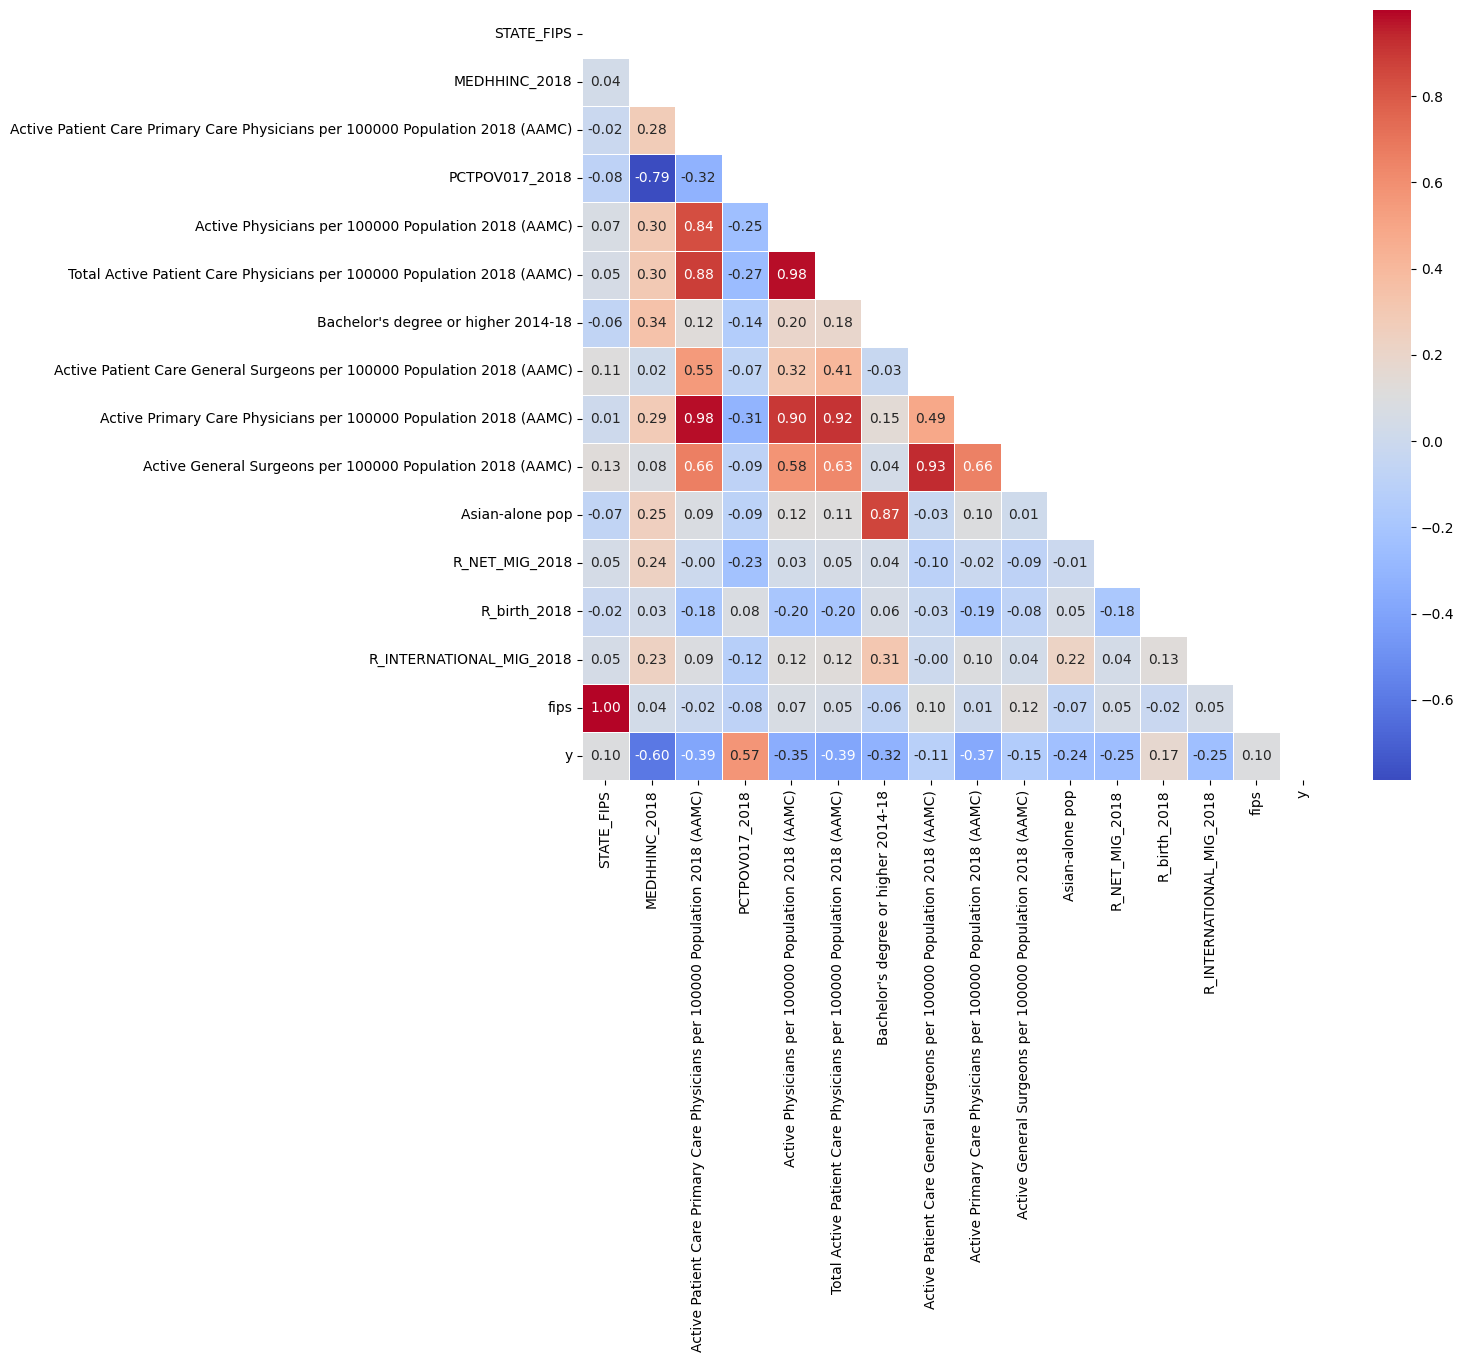

In [89]:
## VIF
X_train.corr()

vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')